# 拉钩网数据分析师岗位项目

## 项目背景

        目前经过了一段时间的学习，掌握了python的基础语法及python在数据分析中的常用库，通过这个项目，对自己学习做一个总结，以及对数据分析这个岗位做一个清楚的认知。

## 项目简介

        本次利用网络爬虫爬取拉勾网数据，通过爬取到的数据分析岗位简介及岗位职责以及所对应的薪酬所需要掌握的知识体系，全方位的了解这个岗位的大致情况和技能图谱。

## 目的

    用数据来解读数据分析师岗位需求
+ 数据分析师岗位需求的地域性分布；
+ 整个群体中薪酬分布的情况；
+ 不同城市数据分析师的薪酬情况是怎样的；
+ 该岗位对于工作经验的要求是怎样的，薪酬是怎样变化的；
+ 从用人单位的角度看，数据分析师应当具备哪些技能；


# 数据整理

In [166]:
# -*- coding:utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import jieba
import jieba.analyse
from wordcloud import WordCloud
import random
from collections import Counter
#首先引入所有需要应用到的库

   #由于matplotlib默认字体不是中文字体，在进行中文显示的时候只有一个框框，因此必须显式的指定字体文件
import matplotlib as mpl

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#读取爬取到的数据
data = pd.read_excel('E:/pythonprogram/lagouprogram/Data_Lagou2.xlsx')

#清理数据
#因投资机构和工资规模字段抓取的数据有点混规模乱，所以讲这两个字段拼接清理成公司
data['公司规模'] = data['投资机构'].str.extract('(^\d+.\d*...)', expand=True).fillna('')+data['公司规模'].str.extract('(^\d+.\d*...)', expand=True).fillna('')
data['地区'] = data['地区'].str.strip('/')
data['工作经验'] = data['工作经验'].str.strip('/')
data['学历要求'] = data['学历要求'].str.strip('/')
data['职位描述'] = data['职位描述'].str.replace('\n',' ')
data['公司名称'] = data['公司名称'].str.extract('(.*)', expand=True)
data['融资阶段'] = data['融资阶段'].str.extract('(.*)', expand=True)
data['行业']=data['行业'].str.extract('(.*)', expand=True)

#删除不需要的列
new_data = data.drop(['投资机构',u'_clueid', u'_fullpath', u'_realpath', u'_theme',
                            u'_middle',u'_createdate',u'_pageno', u'_actionno', u'_actionvalue',u'_prestamp',u'_currentstamp',u'_importtime'],
                            axis = 1)

#清理重复行
clean_data = new_data.drop_duplicates([u'公司名称',u'职位',u'职位描述'])
clean_data.info()

#写入清理过后的数据
#clean_data.to_excel('D:/lagou/Data_Lagou_clean.xlsx')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 447
Data columns (total 10 columns):
职位      438 non-null object
薪资      438 non-null object
地区      438 non-null object
工作经验    438 non-null object
学历要求    438 non-null object
公司名称    438 non-null object
行业      438 non-null object
融资阶段    438 non-null object
公司规模    438 non-null object
职位描述    438 non-null object
dtypes: object(10)
memory usage: 37.6+ KB


    数据经过清洗后可以很清楚的看到数据的有效变量为10个，数据记录438个，所有记录均完整。

### 地域分布情况

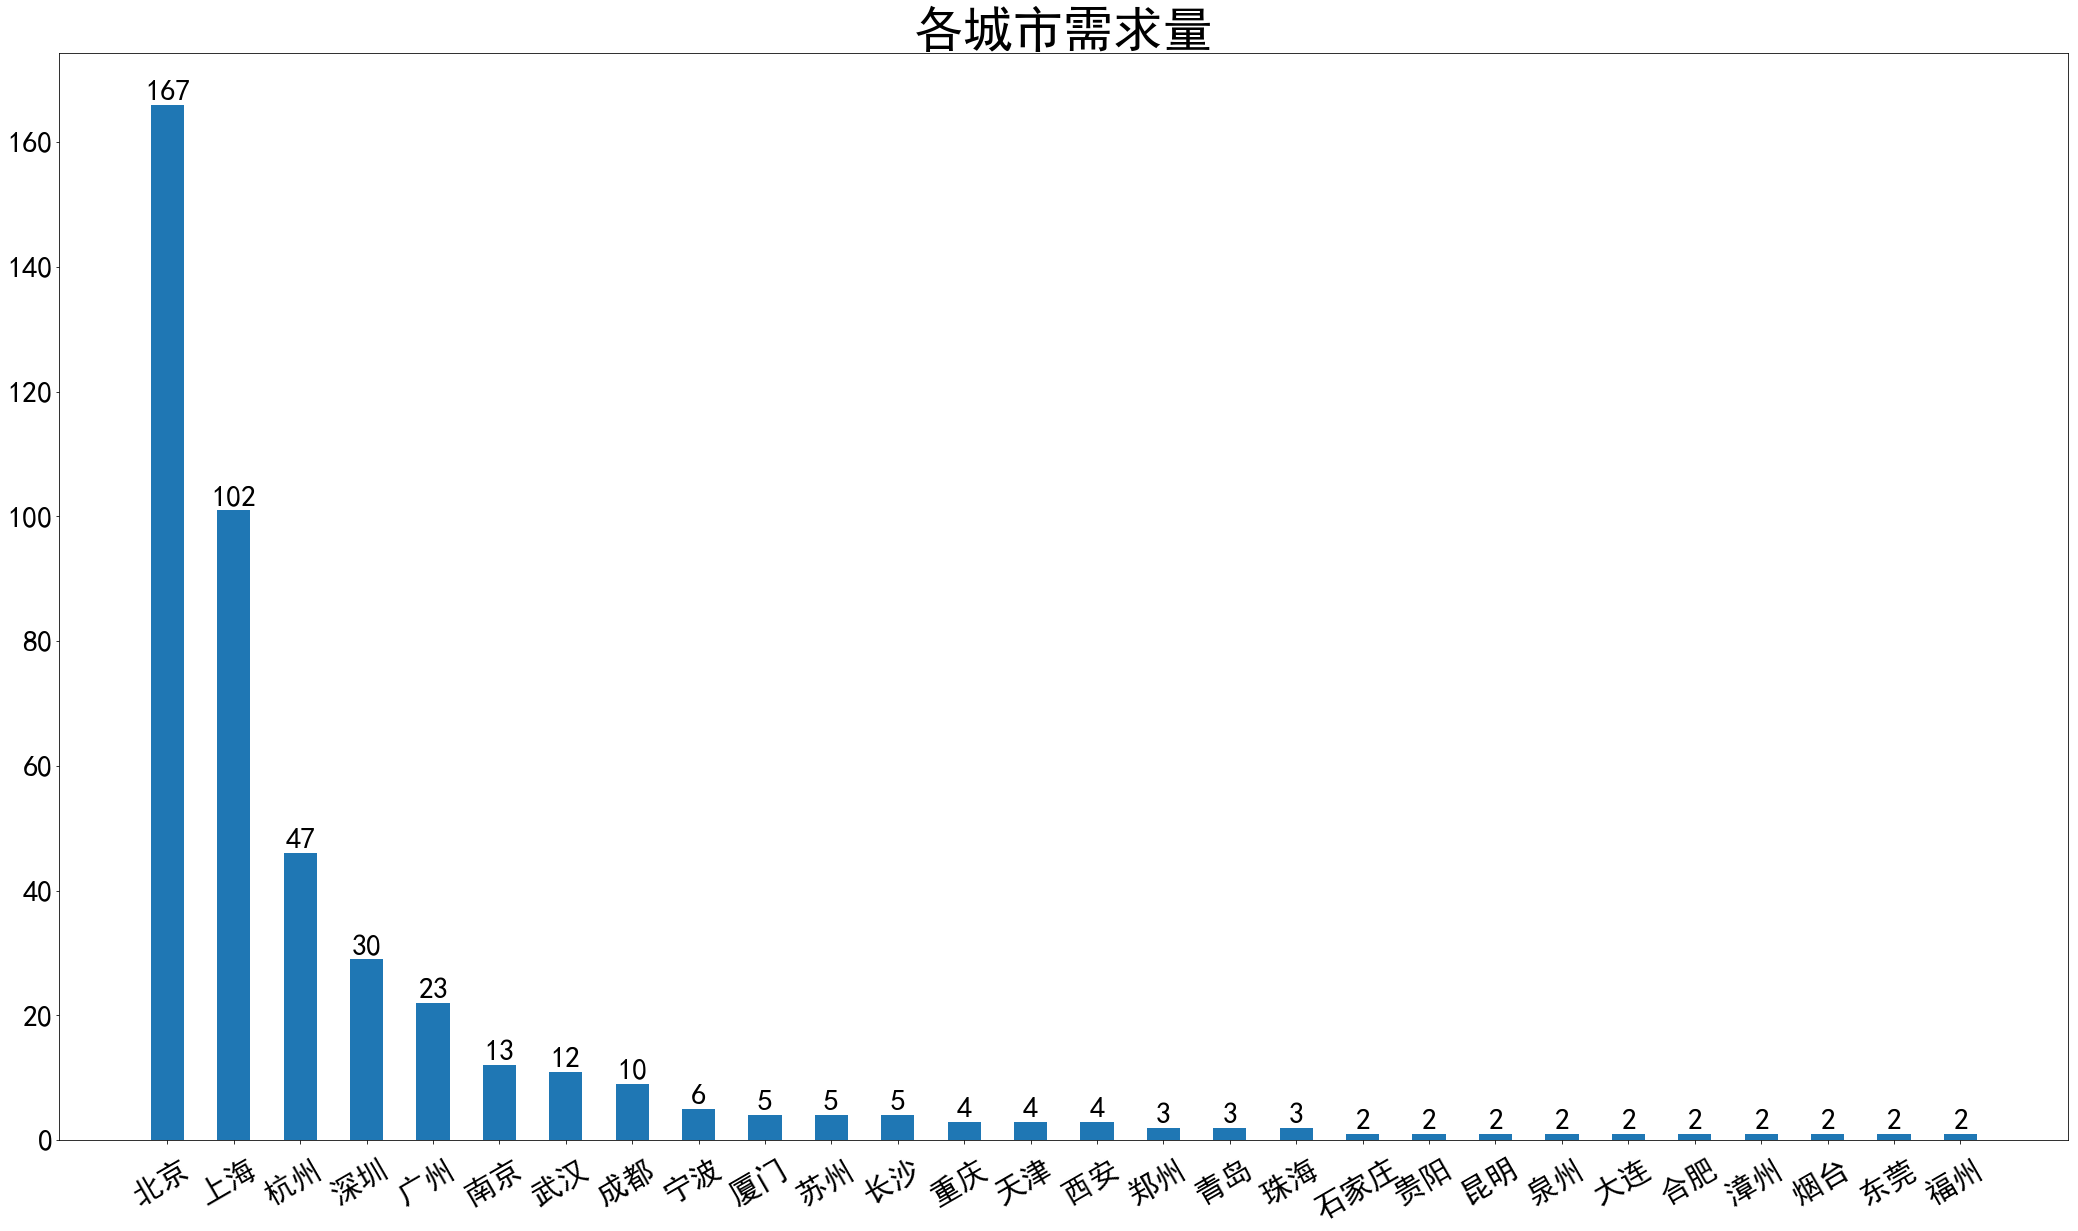

In [167]:
count_by_city = clean_data.groupby(['地区'])['职位'].count().sort_values(ascending = False)
fig = plt.figure(figsize=(36,20))
ax1 = plt.subplot(111)
ax1.set_xticklabels(count_by_city.index, rotation=30)
plt.tick_params(labelsize=30)

rect = ax1.bar(count_by_city.index,count_by_city.values, width = 0.5)
ax1.set_title(u'各城市需求量',fontsize=50)
for a,b in zip(count_by_city.values,count_by_city.index):
    ax1.text(str(b), a+0.05,a+1 ,ha='center', va= 'bottom',fontsize=30)  


        城市经统计，拉勾网上爬取到28个城市的企业有数据分析师的人才需求，其中北京需求量全国第一，需求数量接近总数的百分之四十。排在前5的分别是：北京、上海、杭州、深圳、广州。

        所以想要从事数据分析行业无论是就业机会还是行业最新动态，无疑是这几个城市是最优选择，当然，这几个城市也汇聚了大量此方面的人才，竞争压力也非常大。


### 学历要求

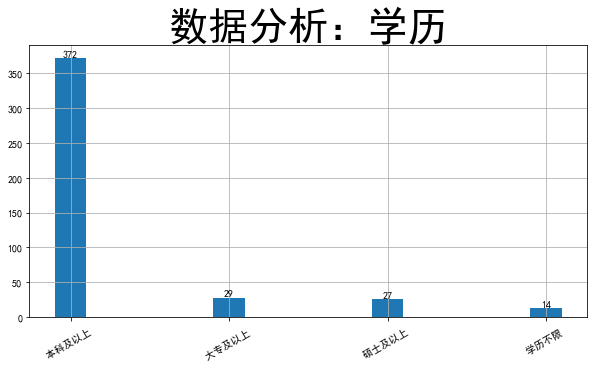

In [168]:
count_by_edu = clean_data.groupby([u'学历要求'])[u'职位'].count().sort_values(ascending = False)
count_by_edu
fig = plt.figure(figsize=(10,5))
ax2 = fig.add_subplot(111)
ax2.set_xticklabels(count_by_edu.index, rotation=30,fontsize=10)
rect = ax2.bar(count_by_edu.index,count_by_edu.values, width = 0.2)
ax2.set_title(u'数据分析：学历',fontsize=40)
for a,b in zip(count_by_edu.values,count_by_edu.index):
    ax2.text(str(b), a,a+1 ,ha='center', va= 'bottom',fontsize=10) 
plt.grid()

        从上图可以看到数据分析行业基本从业要求只要满足本科学历就可以胜任。

### 总体薪酬情况

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


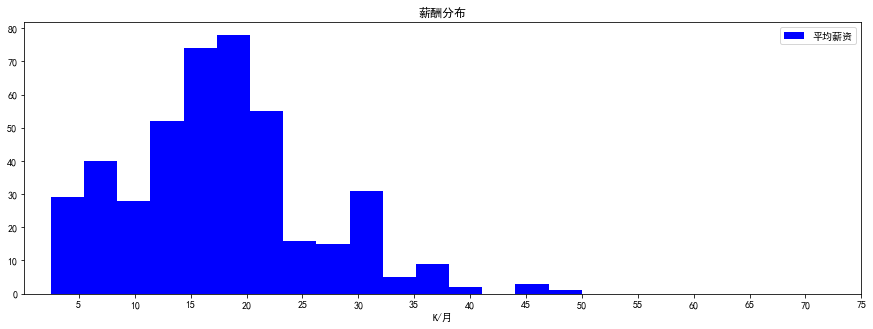

In [169]:
 #因薪资为区间取值，因此将此数据进行清理，取区间的均值作为薪酬值
def avg_salary(salary):
    #该函数传入一个薪酬区间字符串，并将其转换成区间均值并返回
    s_list = salary.split('-')
    s_min = int(s_list[0][:-1])
    s_max = int(s_list[1][:-1])
    s_avg = float(s_min + s_max)/2
    return s_avg

clean_data[u'平均薪资'] = clean_data[u'薪资'].apply(avg_salary)
clean_data[u'平均薪资']

fig = plt.figure(figsize =  (15,5))
ax3 = plt.subplot(111)
rect = ax3.hist(clean_data[u'平均薪资'], color='b',bins = 16,histtype='bar')
ax3.set_title(u'薪酬分布')
ax3.set_xlabel(u'K/月')
plt.xticks(range(5,80,5))
plt.legend()

    从上图可以看出做数据分析的绝大多数薪资水平都处于12-22K的薪酬范围，10K以下和20K以上的人数差不多，总的来说薪酬是可观的。

### 不同城市的薪酬分布

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Text(0.5,1,'薪资上限分布情况')

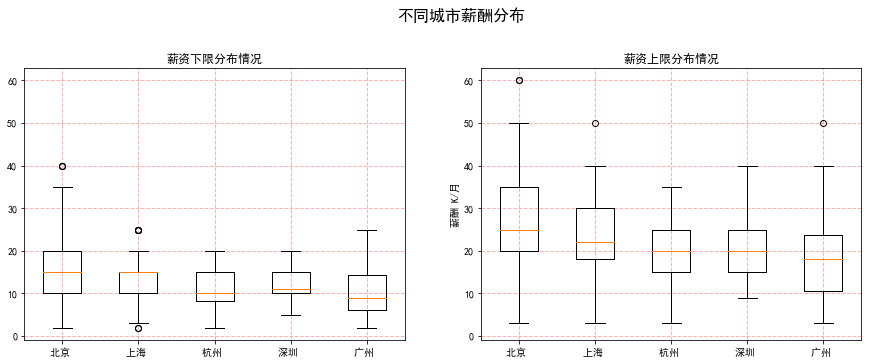

In [170]:
#观察各城市的薪酬分布箱线图
def min_salary(salary):
    #该函数传入一个薪酬区间字符串，并将较小值返回
    s_list = salary.split('-')
    s_min = int(s_list[0][:-1])
    return s_min
def max_salary(salary):
    #该函数传入一个薪酬区间字符串，并将较大值返回
    s_list = salary.split('-')
    s_max = int(s_list[1][:-1])
    return s_max
#观察分城市的薪酬分布箱线
clean_data[u'最小薪资'] = clean_data[u'薪资'].apply(min_salary)

clean_data[u'最大薪资'] = clean_data[u'薪资'].apply(max_salary)
count_by_city_min_salary = clean_data.groupby([u'地区'])[u'最小薪资']

count_by_city_max_salary = clean_data.groupby([u'地区'])[u'最大薪资']


#取前5个城市的数据
small_data_by_city = count_by_city[0:5]

#将数据分组取出并放入列表
df1 = []
for group in small_data_by_city.index:
    v = count_by_city_min_salary.get_group(group).values
    df1.append(v)
df2 = []
for group in small_data_by_city.index:
    v = count_by_city_max_salary.get_group(group).values
    df2.append(v)


fig = plt.figure(figsize = (15,5))
ax4 = plt.subplot(121)
ax5 = plt.subplot(122,sharey=ax4)
rect = ax4.boxplot(df1)
rect = ax5.boxplot(df2)
ax4.set_xticklabels(small_data_by_city.index)
ax5.set_xticklabels(small_data_by_city.index)
fig.suptitle(u'不同城市薪酬分布',fontsize=16,x=0.53,y=1.05,)
plt.ylabel(u'薪酬 K/月')
ax4.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax5.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax4.set_title(u'薪资下限分布情况')
ax5.set_title(u'薪资上限分布情况')

        因为后面的城市需求较少，参考价值不高，所以只分析前面5个城市的情况，因薪资都是取值区间，但是一般情况上限很多时候是给人参考，除非是碰到特牛的人，才可能达到，所以中值或者较小值得参考脚趾比较高，上图是将上限值和下限值分别提取出来做比较，综合情况可以看出北京市最好的，其次是上海和深圳，所以在深圳是一个不错的发展选择。

### 工作经验需求

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


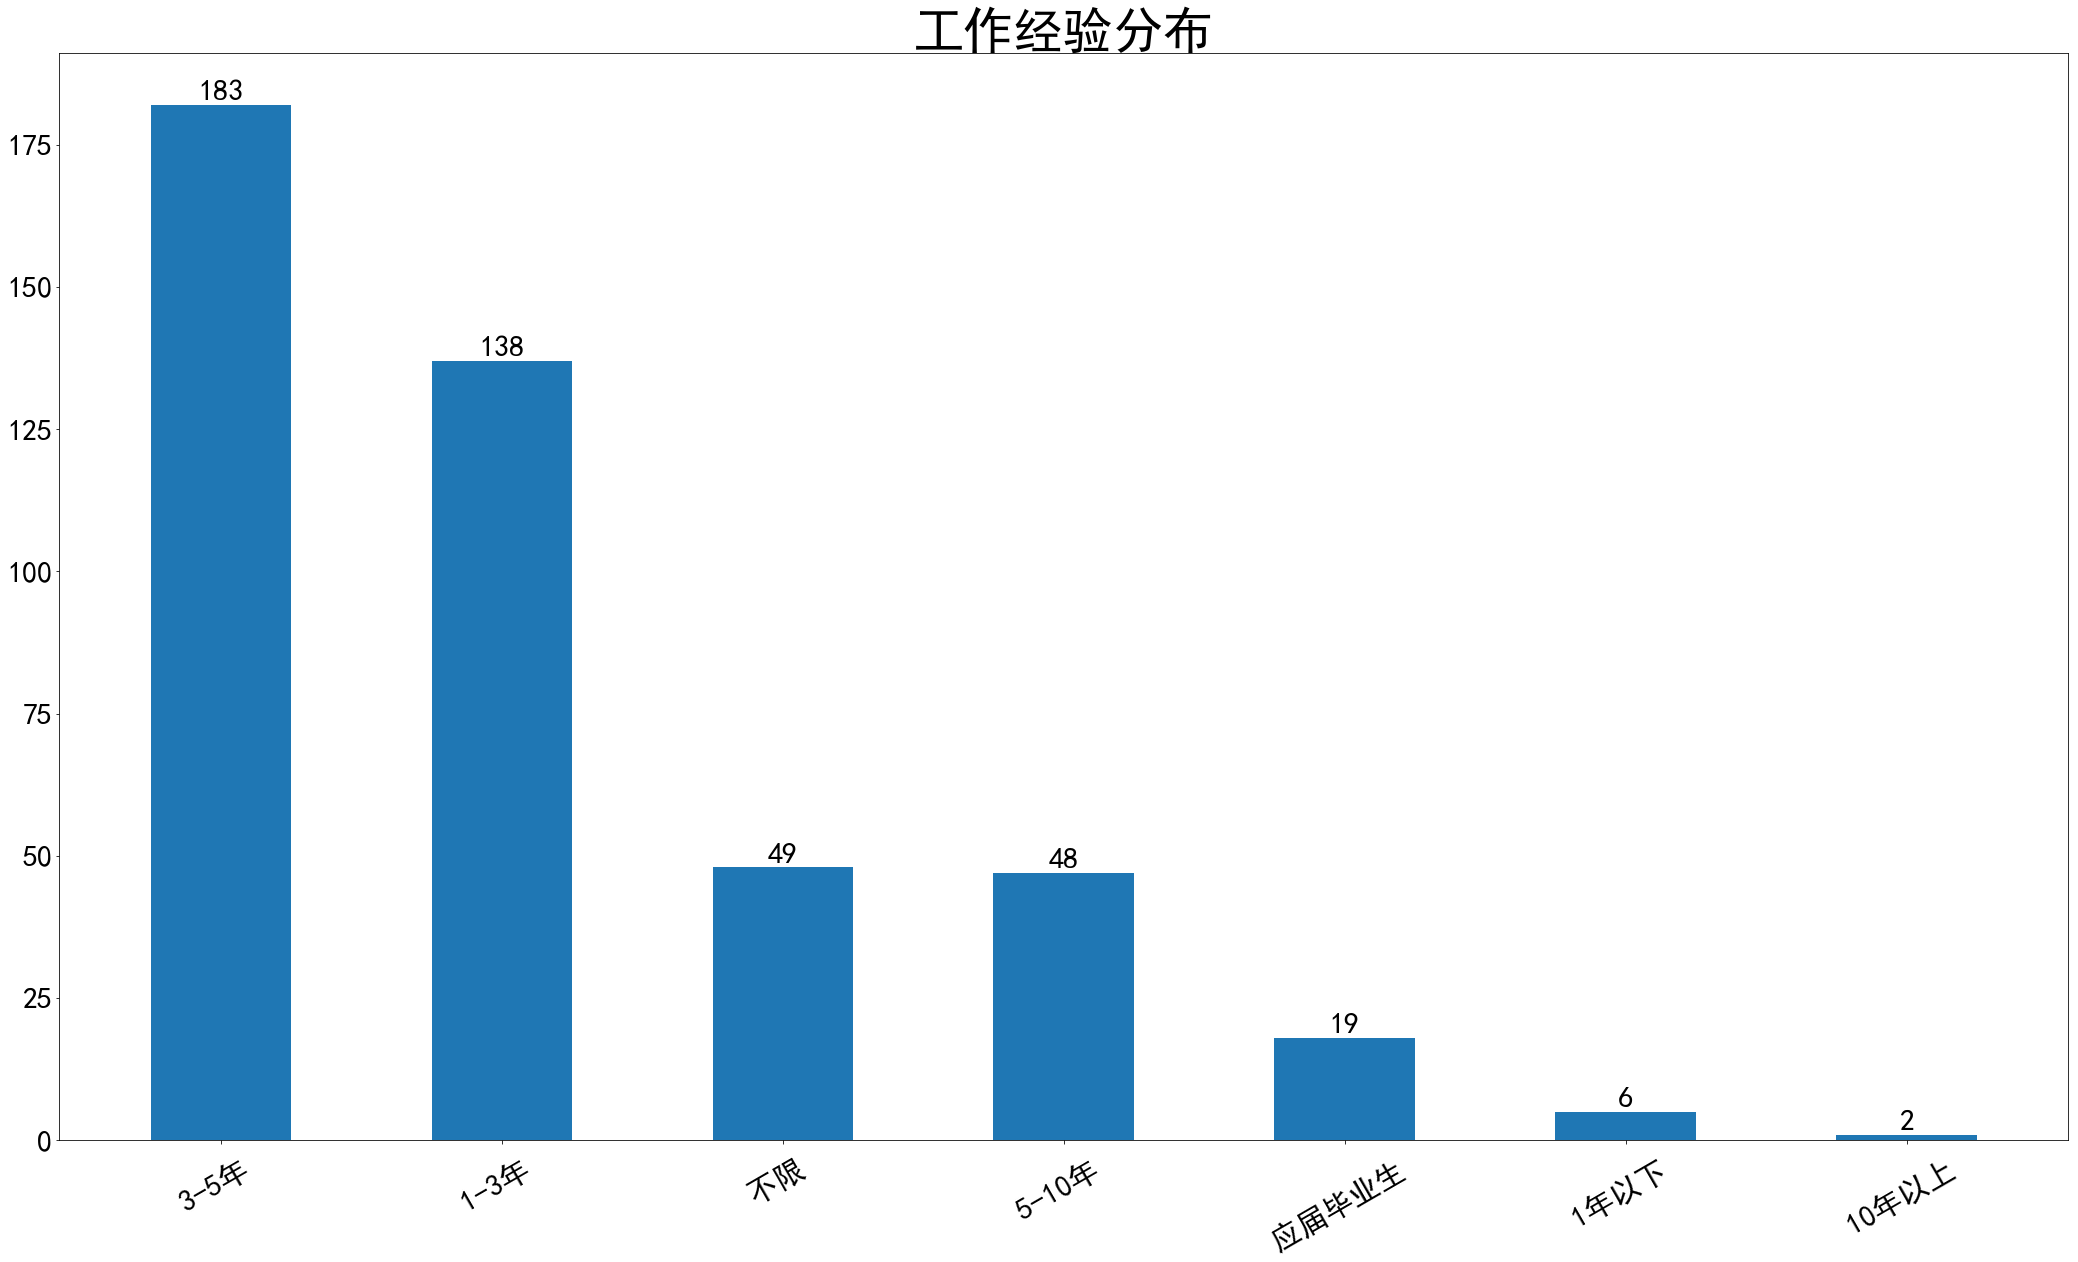

In [171]:
#处理工作经验这一列，干掉‘经验’二字

def remove_first_2_word(word):
    return word[2:]
clean_data[u'工作经验'] = clean_data[u'工作经验'].apply(remove_first_2_word)


count_by_experience = clean_data.groupby([u'工作经验'])[u'职位'].count().sort_values(ascending = False)
count_by_experience
fig = plt.figure(figsize=(36,20))
ax6 = plt.subplot(111)
ax6.set_xticklabels(count_by_experience.index, rotation=30)
plt.tick_params(labelsize=30)
rect = ax6.bar(count_by_experience.index,count_by_experience.values, width = 0.5)
ax6.set_title(u'工作经验分布',fontsize=50)
for a,b in zip(count_by_experience.values,count_by_experience.index):
    ax6.text(str(b), a+0.05,a+1 ,ha='center', va= 'bottom',fontsize=30)  

        可以看出需求量最大的是3-5年，说明先在市场较为成熟，更多的需要较为资深的分析师去探索市场，其次是1-3年，说明市场后期需要的人才也是较多的，也有较多机会，然后是不限，不限和应届还有1年以下的可以归为一类，都是属于无经验或基础入门类，然后5-10年较少，10年以上基本没有需求，也就是说可能会碰到发展瓶颈期，需要在前期快速成长。

### 不同工作经验的薪酬分布

Text(0.5,1,'薪资上限分布情况')

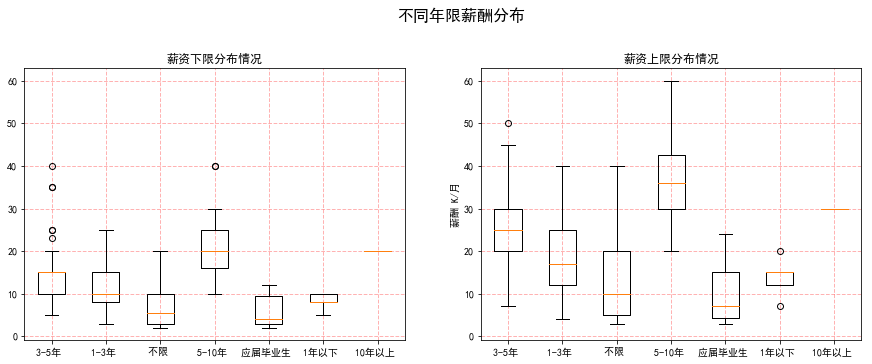

In [172]:

count_by_exp_min_salary = clean_data.groupby([u'工作经验'])[u'最小薪资']

count_by_exp_max_salary = clean_data.groupby([u'工作经验'])[u'最大薪资']
count_by_exp_min_salary.mean()

#将经验分组
count_by_exp_min = clean_data.groupby([u'工作经验'])[u'最小薪资'].count().sort_values(ascending = False)
count_by_exp_max = clean_data.groupby([u'工作经验'])[u'最大薪资'].count().sort_values(ascending = False)



#将数据分组取出并放入列表
df1 = []
for group in count_by_exp_min.index:
    v = count_by_exp_min_salary.get_group(group).values
    df1.append(v)
df2 = []
for group in count_by_exp_max.index:
    v = count_by_exp_max_salary.get_group(group).values
    df2.append(v)


fig = plt.figure(figsize = (15,5))
ax7 = plt.subplot(121)
ax8 = plt.subplot(122,sharey=ax7)
rect = ax7.boxplot(df1)
rect = ax8.boxplot(df2)
ax7.set_xticklabels(count_by_exp_min.index)
ax8.set_xticklabels(count_by_exp_max.index)
fig.suptitle(u'不同年限薪酬分布',fontsize=16,x=0.53,y=1.05,)
plt.ylabel(u'薪酬 K/月')
ax7.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax8.grid(color='r', linestyle='--', linewidth=1,alpha=0.3)
ax7.set_title(u'薪资下限分布情况')
ax8.set_title(u'薪资上限分布情况')


        上图可以很明显的看出，基本是随着工作年限的增长收入直线增加的，10年内并不会说停滞或倒退的现象。

### 职业技能关键词

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


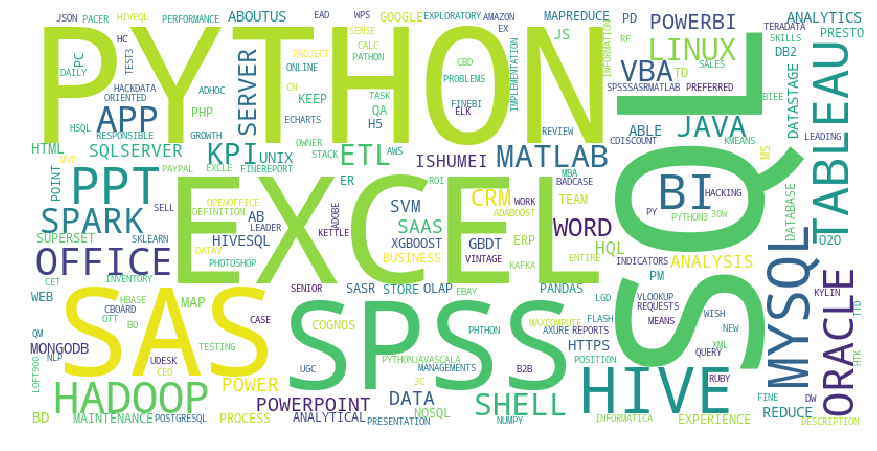

In [173]:
#首先抽取关键词
def key_words(text):
    key_words = jieba.analyse.extract_tags(text, topK=20, withWeight=False, allowPOS=())
    return key_words
clean_data['key_words'] = clean_data['职位描述'].apply(key_words)

#启用自定义字典
jieba.load_userdict('E:/pythonprogram/lagouprogram/userdict.txt')
jieba.suggest_freq('office', False)


#创建一个文本，将关键词列表全部写入该文本
#因技能类全是英文词语，所以将中文词语全部过滤掉，只填入英文技能分词
def write_to_text(word_list):
    with open('E:/pythonprogram/lagouprogram/word_list_text.txt','a',encoding="utf-8") as f:
        for word in word_list:
            for i in word:
                #ord将字符转化为ASCII编码
                if ord(i) < 256:                    
                    f.writelines((word.upper()+u','))
                    break
            
clean_data['key_words'].apply(write_to_text)

text = open('E:/pythonprogram/lagouprogram/word_list_text.txt','r',encoding="utf-8").read()

#因wordcloud不支持中文显示，如有中文需要显示，请先下载支持中文字体，然后在词云地址中加上地址就行
#font = r'C:\Windows\Fonts\simfang.ttf'
#词云地址font_path=font

#collocations=False，默认为True,会统计搭配词语，导致有部分词语会重复出现
wcd = WordCloud(width = 800, height = 400,background_color = 'white',collocations=False).generate(text)

fig = plt.figure(figsize=(15,8))
#默认词云显示
plt.imshow(wcd)
plt.axis("off")
plt.show()
 

        词云可以很清楚的看出对于数据分析这个岗位，企业要求的技能出现频率较高的就是PYTHON,SQL,EXCEL，因为在工作中SQL属于日常必用，PYTHON也学习了一段时间，目前相对我而言基本可以满足要求，这3点也基本是数据处理必备技能。

# 结论分析

    通过上面的分析，我们可以得到的结论有这些：
1. 数据分析这一岗位，有大量的工作机会集中在北上广深以及杭州。
2. 大多数据分析师的收入集中在10k-20k每月，但是未来可期。
3. 从待遇上看，深圳虽然不是最好，但是也很不错。
4. 数据分析是个年轻的职业方向，基本上都是要求在5年以下的岗位。
6. 随着经验的提升，数据分析师的薪酬也在不断提高。
7. 数据分析师需求频率排在前列的技能有：**SQL，Excel, SAS，SPSS, Python, Hadoop，Tableau**和**MySQL**等，其中SQL和Excel简直可以说是必备技能。 
9. SQL语言和传统的SAS，SPSS两大数据分析软件，能够让你在保证中等收入的条件下，能够适应更多企业的要求，也就意味着更多的工作机会。

# 思考和总结

        本次分析仅仅只涉及到最基础的数据处理及图形展示，在此过程中有参考网上的一些知识，也对一些不熟悉的地方有了更多的了解，虽然初学的过程很艰难，但是随着后期的逐渐使用，会越来越熟练，现在走过的弯路，以后都将会是直路，当然数据分析岗最重要的价值体现是建模去预测未来某些趋势的发展，未来会加强统计学的学习。